In [1]:
# I know this is not the most elegant thing to do, but let me be
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from pathlib import Path

from experiments import Experiment
from opt_attack.attack import Dist, ObjectFun

In [3]:
PARENT_DIR = Path.cwd().parent.joinpath('logs/experiments')
RESULTS_CSV = PARENT_DIR.joinpath('results.csv')

In [4]:
df = pd.read_csv(RESULTS_CSV)

In [5]:
# Returns the name of the best adversarial example found for a given formulation, norm, a & t
def get_best_adv_example(formulation, norm, attacker_name, a, t):
    filt_df = df[
        (df['formulation'] == formulation) &
        (df['norm'] == norm) &
        (df['attacker_name'] == attacker_name) &
        (df['a'] == a) &
        (df['t'] == t) &
        (df['success'] == True)
    ]

    # Try to reconstruct the experiment object to get the name
    if len(filt_df.index) > 0:
        row = filt_df.loc[filt_df['distance'].idxmin()]
        exp = Experiment(
            a=int(row['a']),
            t=int(row['t']),
            c=float(row['c']),
            formulation=ObjectFun[row['formulation']],
            norm=Dist[row['norm']],
            attacker_name=row['attacker_name']
        )
        return PARENT_DIR.joinpath(f'{exp}.png')
    
    return ''

In [6]:
def generate_image_all(formulation, norm, attacker_name='SciPyAttack'):
    image_size = (28, 28)
    rows, cols = 10, 10

    # Create a figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))

    for i in range(10):
        for j in range(10):

            file_name = get_best_adv_example(formulation, norm, attacker_name, i, j)

            if os.path.exists(file_name):
                img = mpimg.imread(file_name)
            else:
                img = np.array(Image.new('L', image_size, 'white'))

            axes[i, j].imshow(img, cmap='gray')
            axes[i, j].set_xticklabels([])
            axes[i, j].set_yticklabels([])
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])

    # Add row and column labels
    for ax, col in zip(axes[9], range(cols)):
        ax.set_xlabel(f'{col}')
    for ax, row in zip(axes[:,0], range(rows)):
        ax.set_ylabel(f'{row}')

    # Add axis titles
    fig.text(0.5, 0.04, 'Target', ha='center', va='center', fontsize='large')
    fig.text(0.04, 0.5, 'Source', ha='center', va='center', rotation='vertical', fontsize='large')

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.tight_layout(rect=[0.05, 0.05, 1, 1])

    # Save the combined image
    savepath = PARENT_DIR.joinpath('figs', f'{formulation}-{norm}-{attacker_name}.png')
    plt.savefig(savepath)
    plt.show()

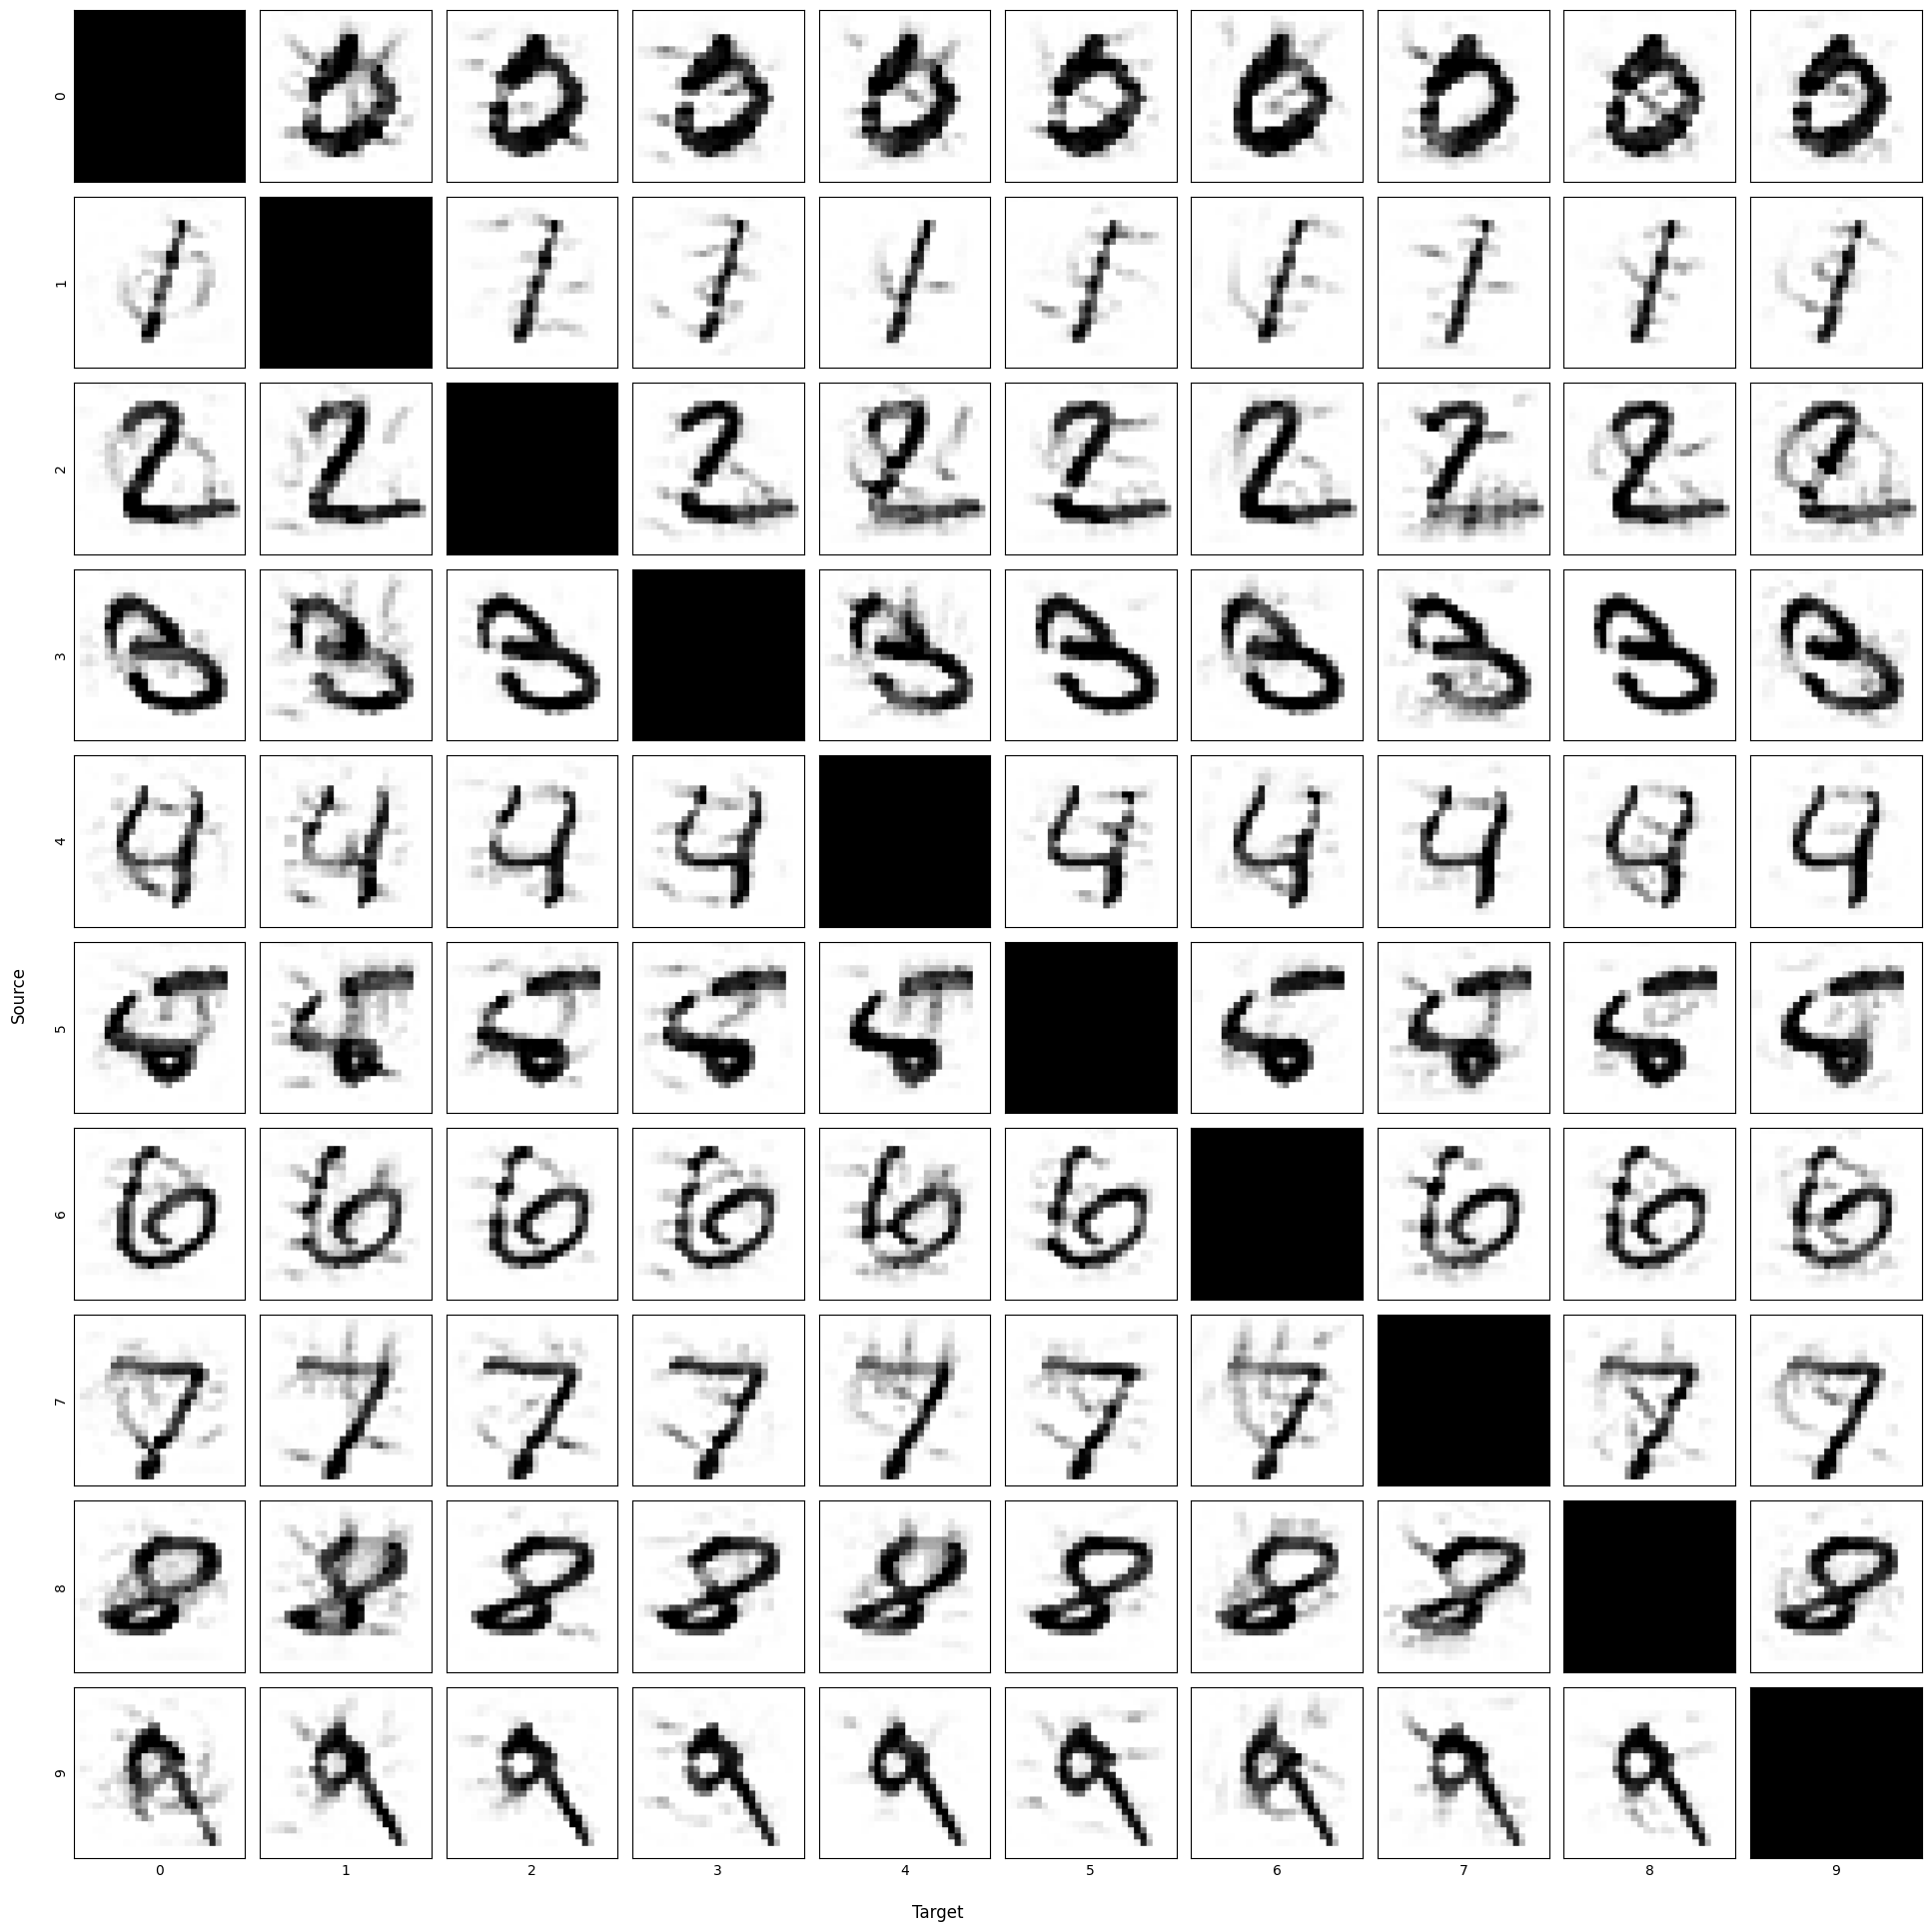

In [7]:
generate_image_all(ObjectFun.szegedy.name, Dist.L2.name, 'SciPyAttack')

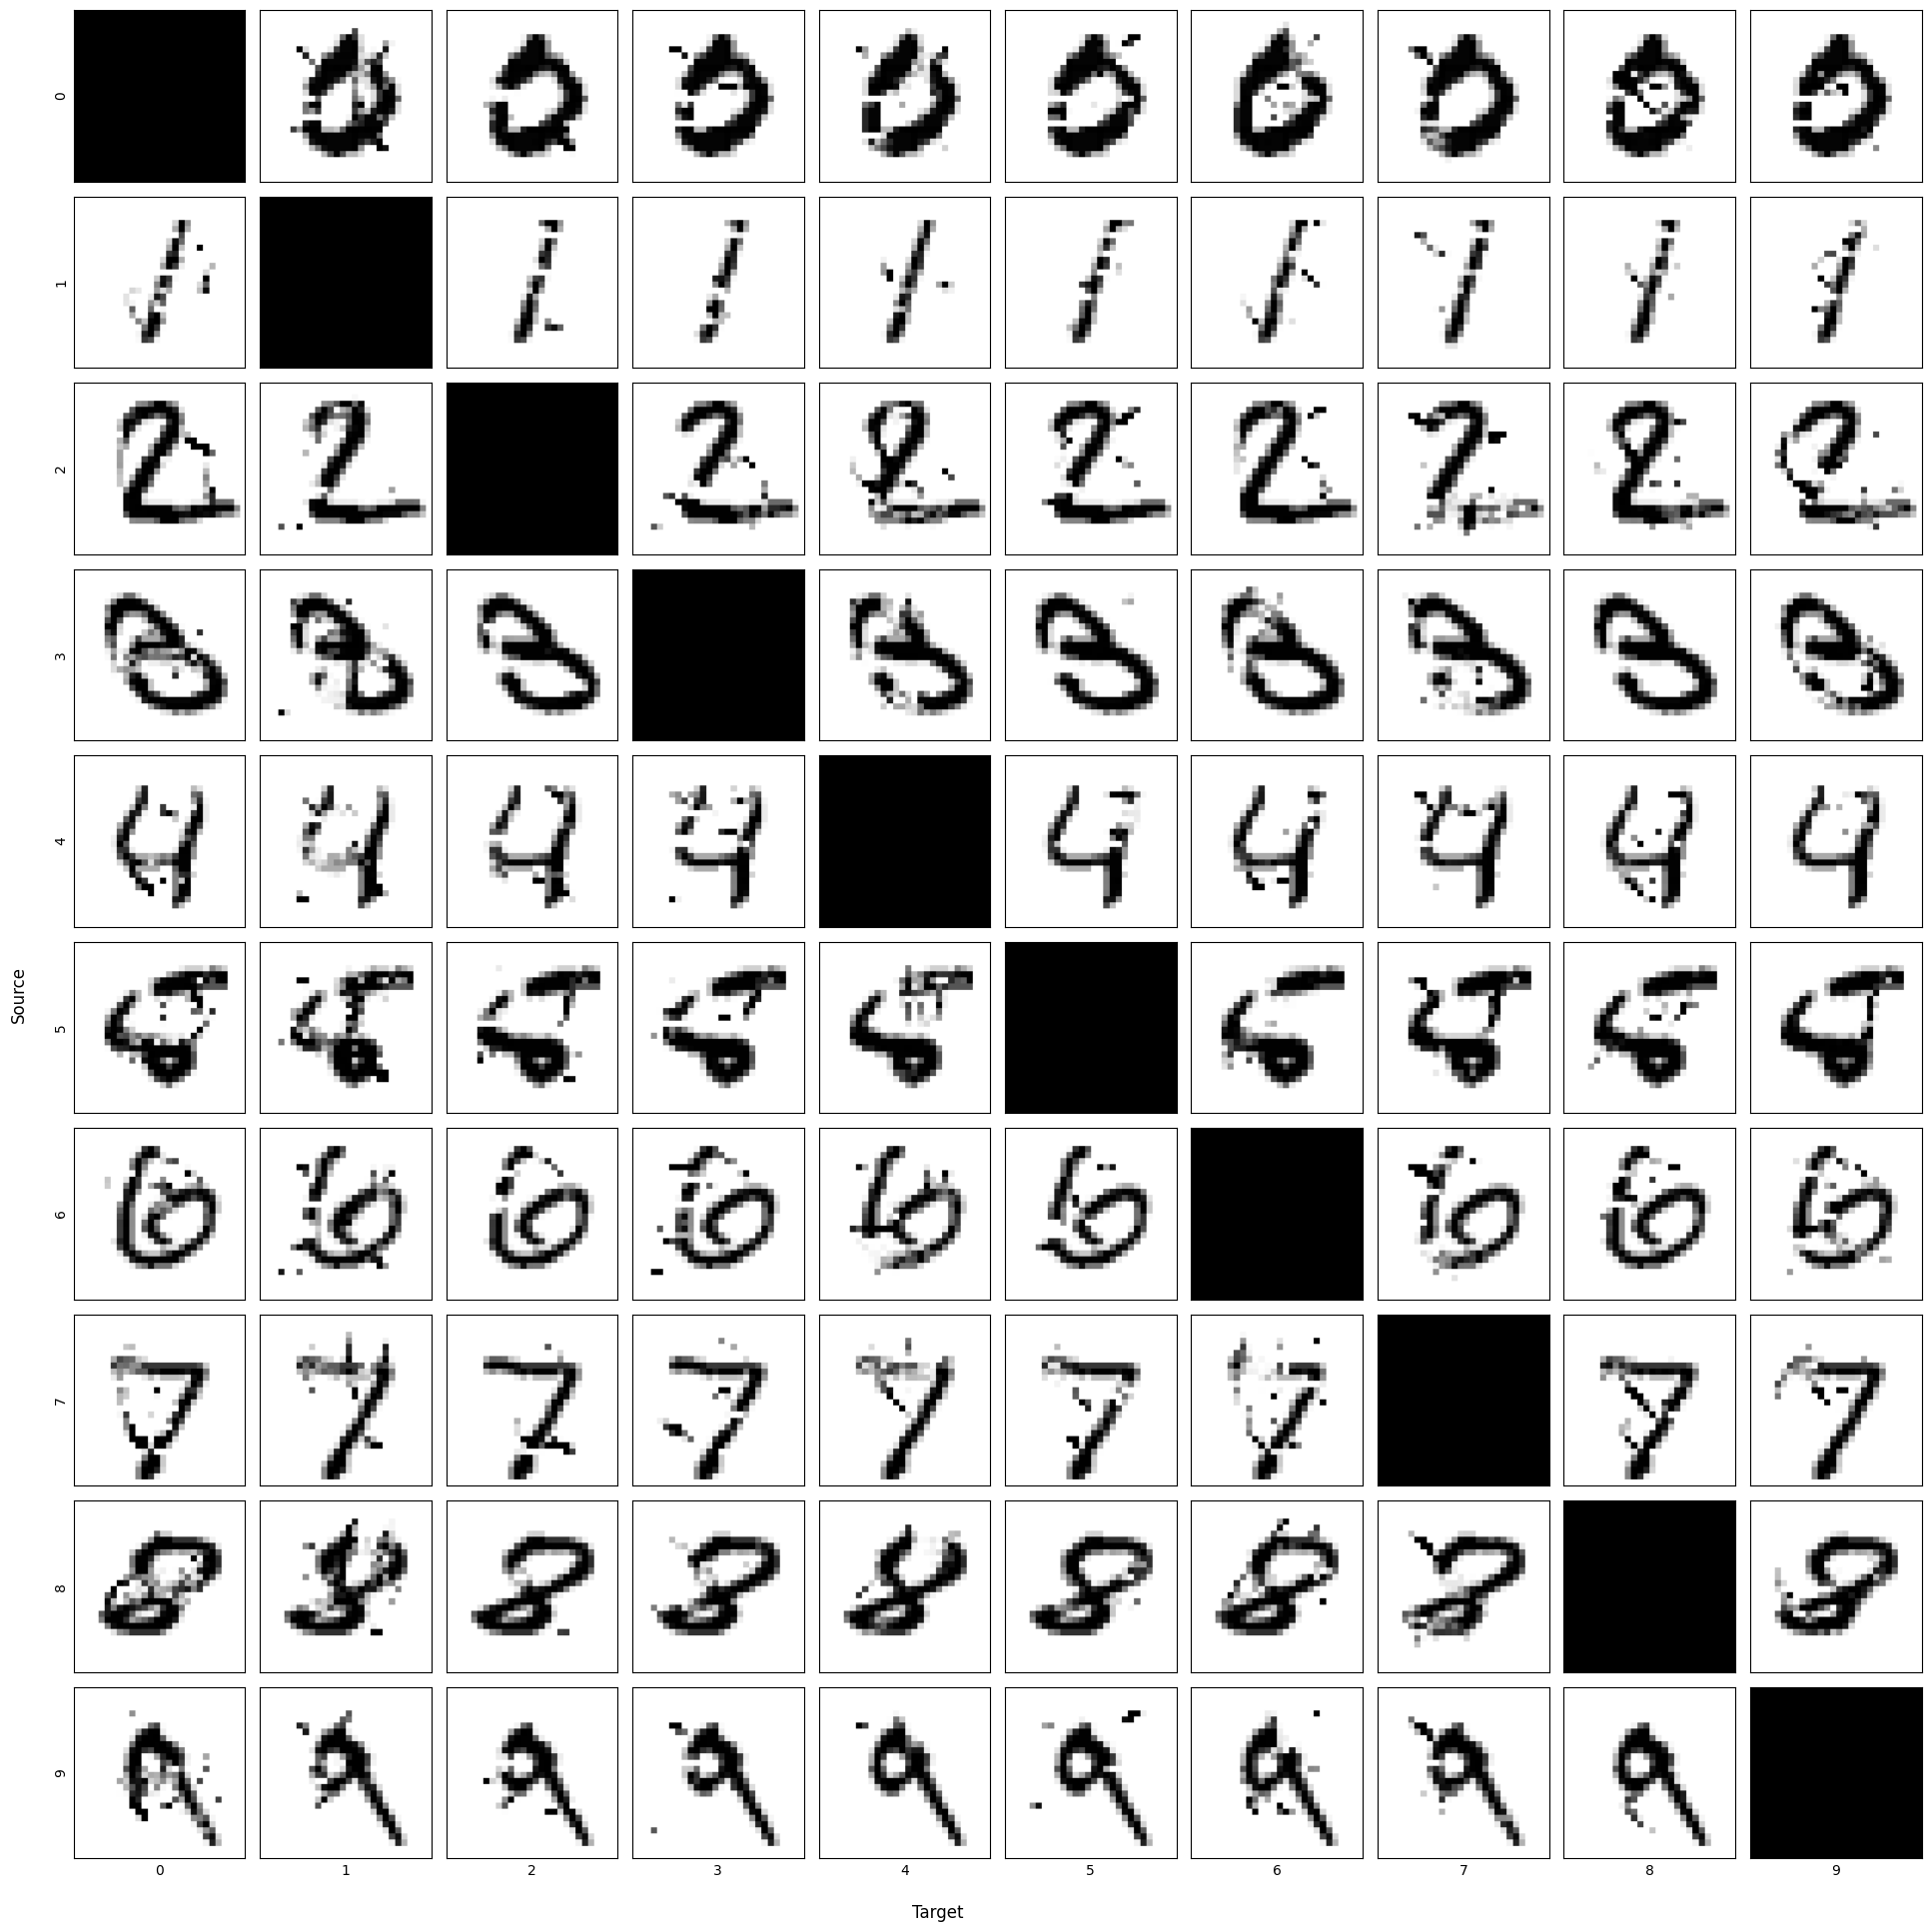

In [8]:
generate_image_all(ObjectFun.szegedy.name, Dist.L1.name, 'SciPyAttack')

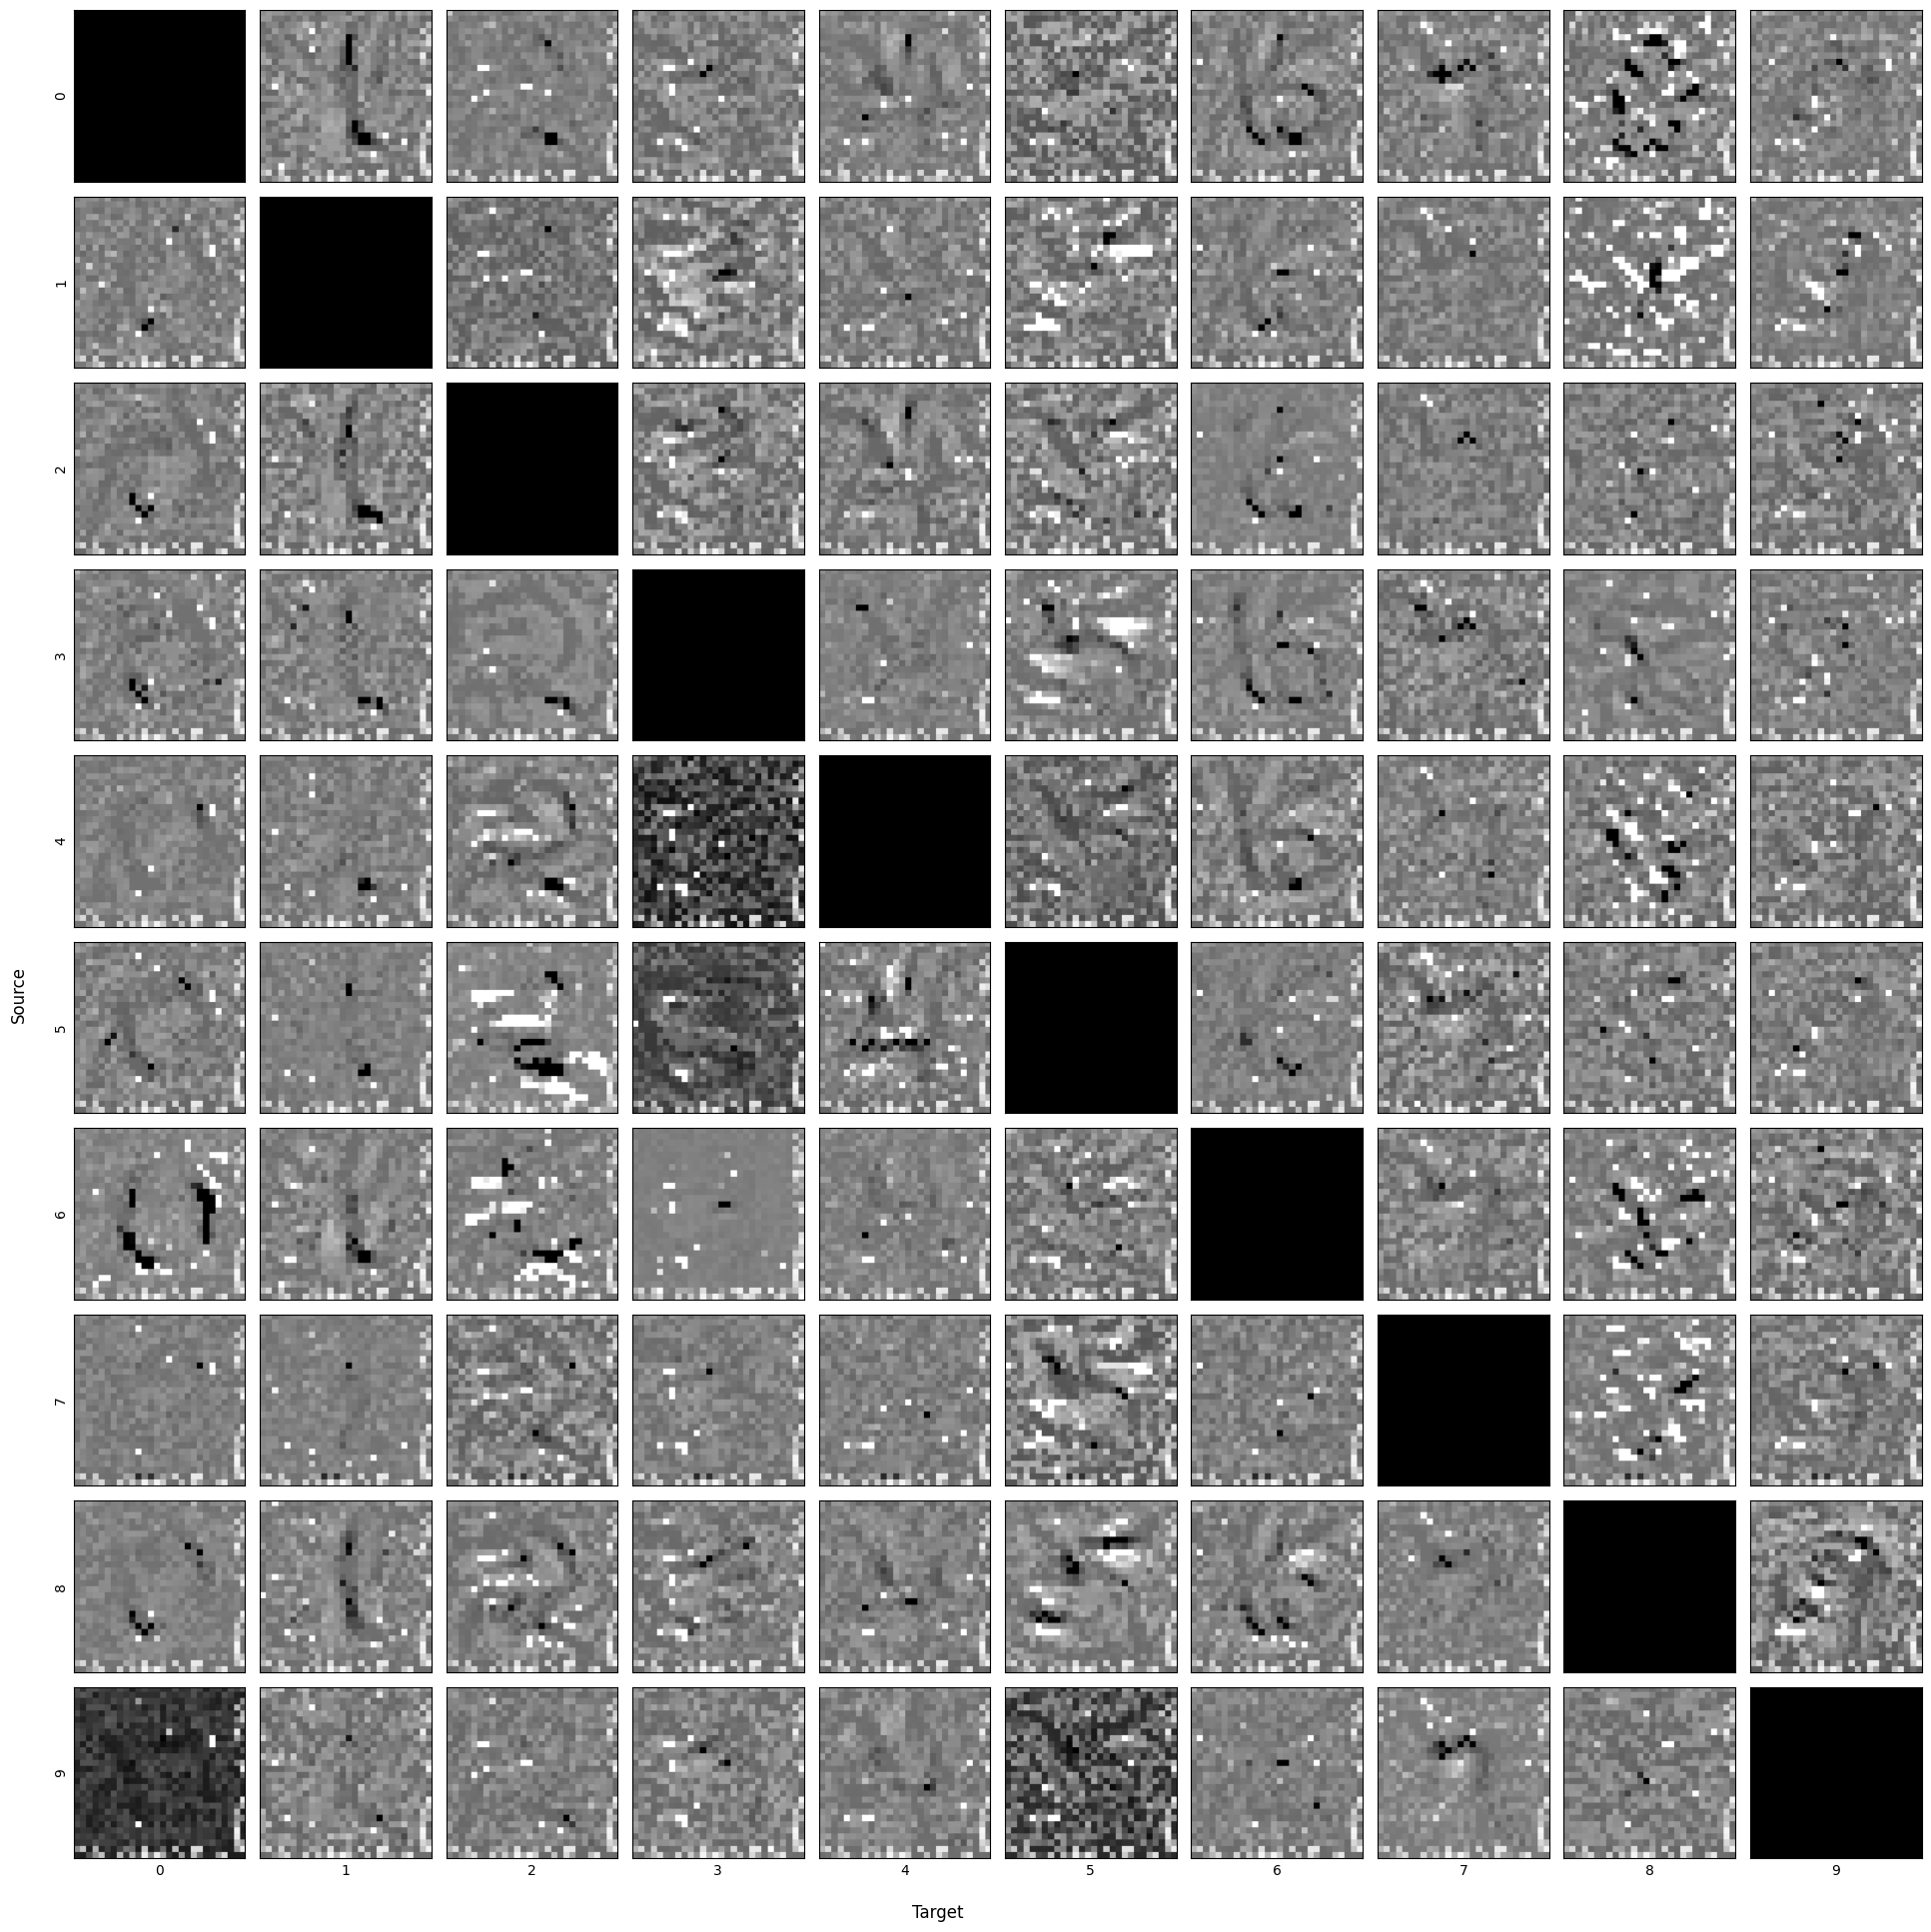

In [9]:
generate_image_all(ObjectFun.szegedy.name, Dist.LINF.name, 'SciPyAttack')

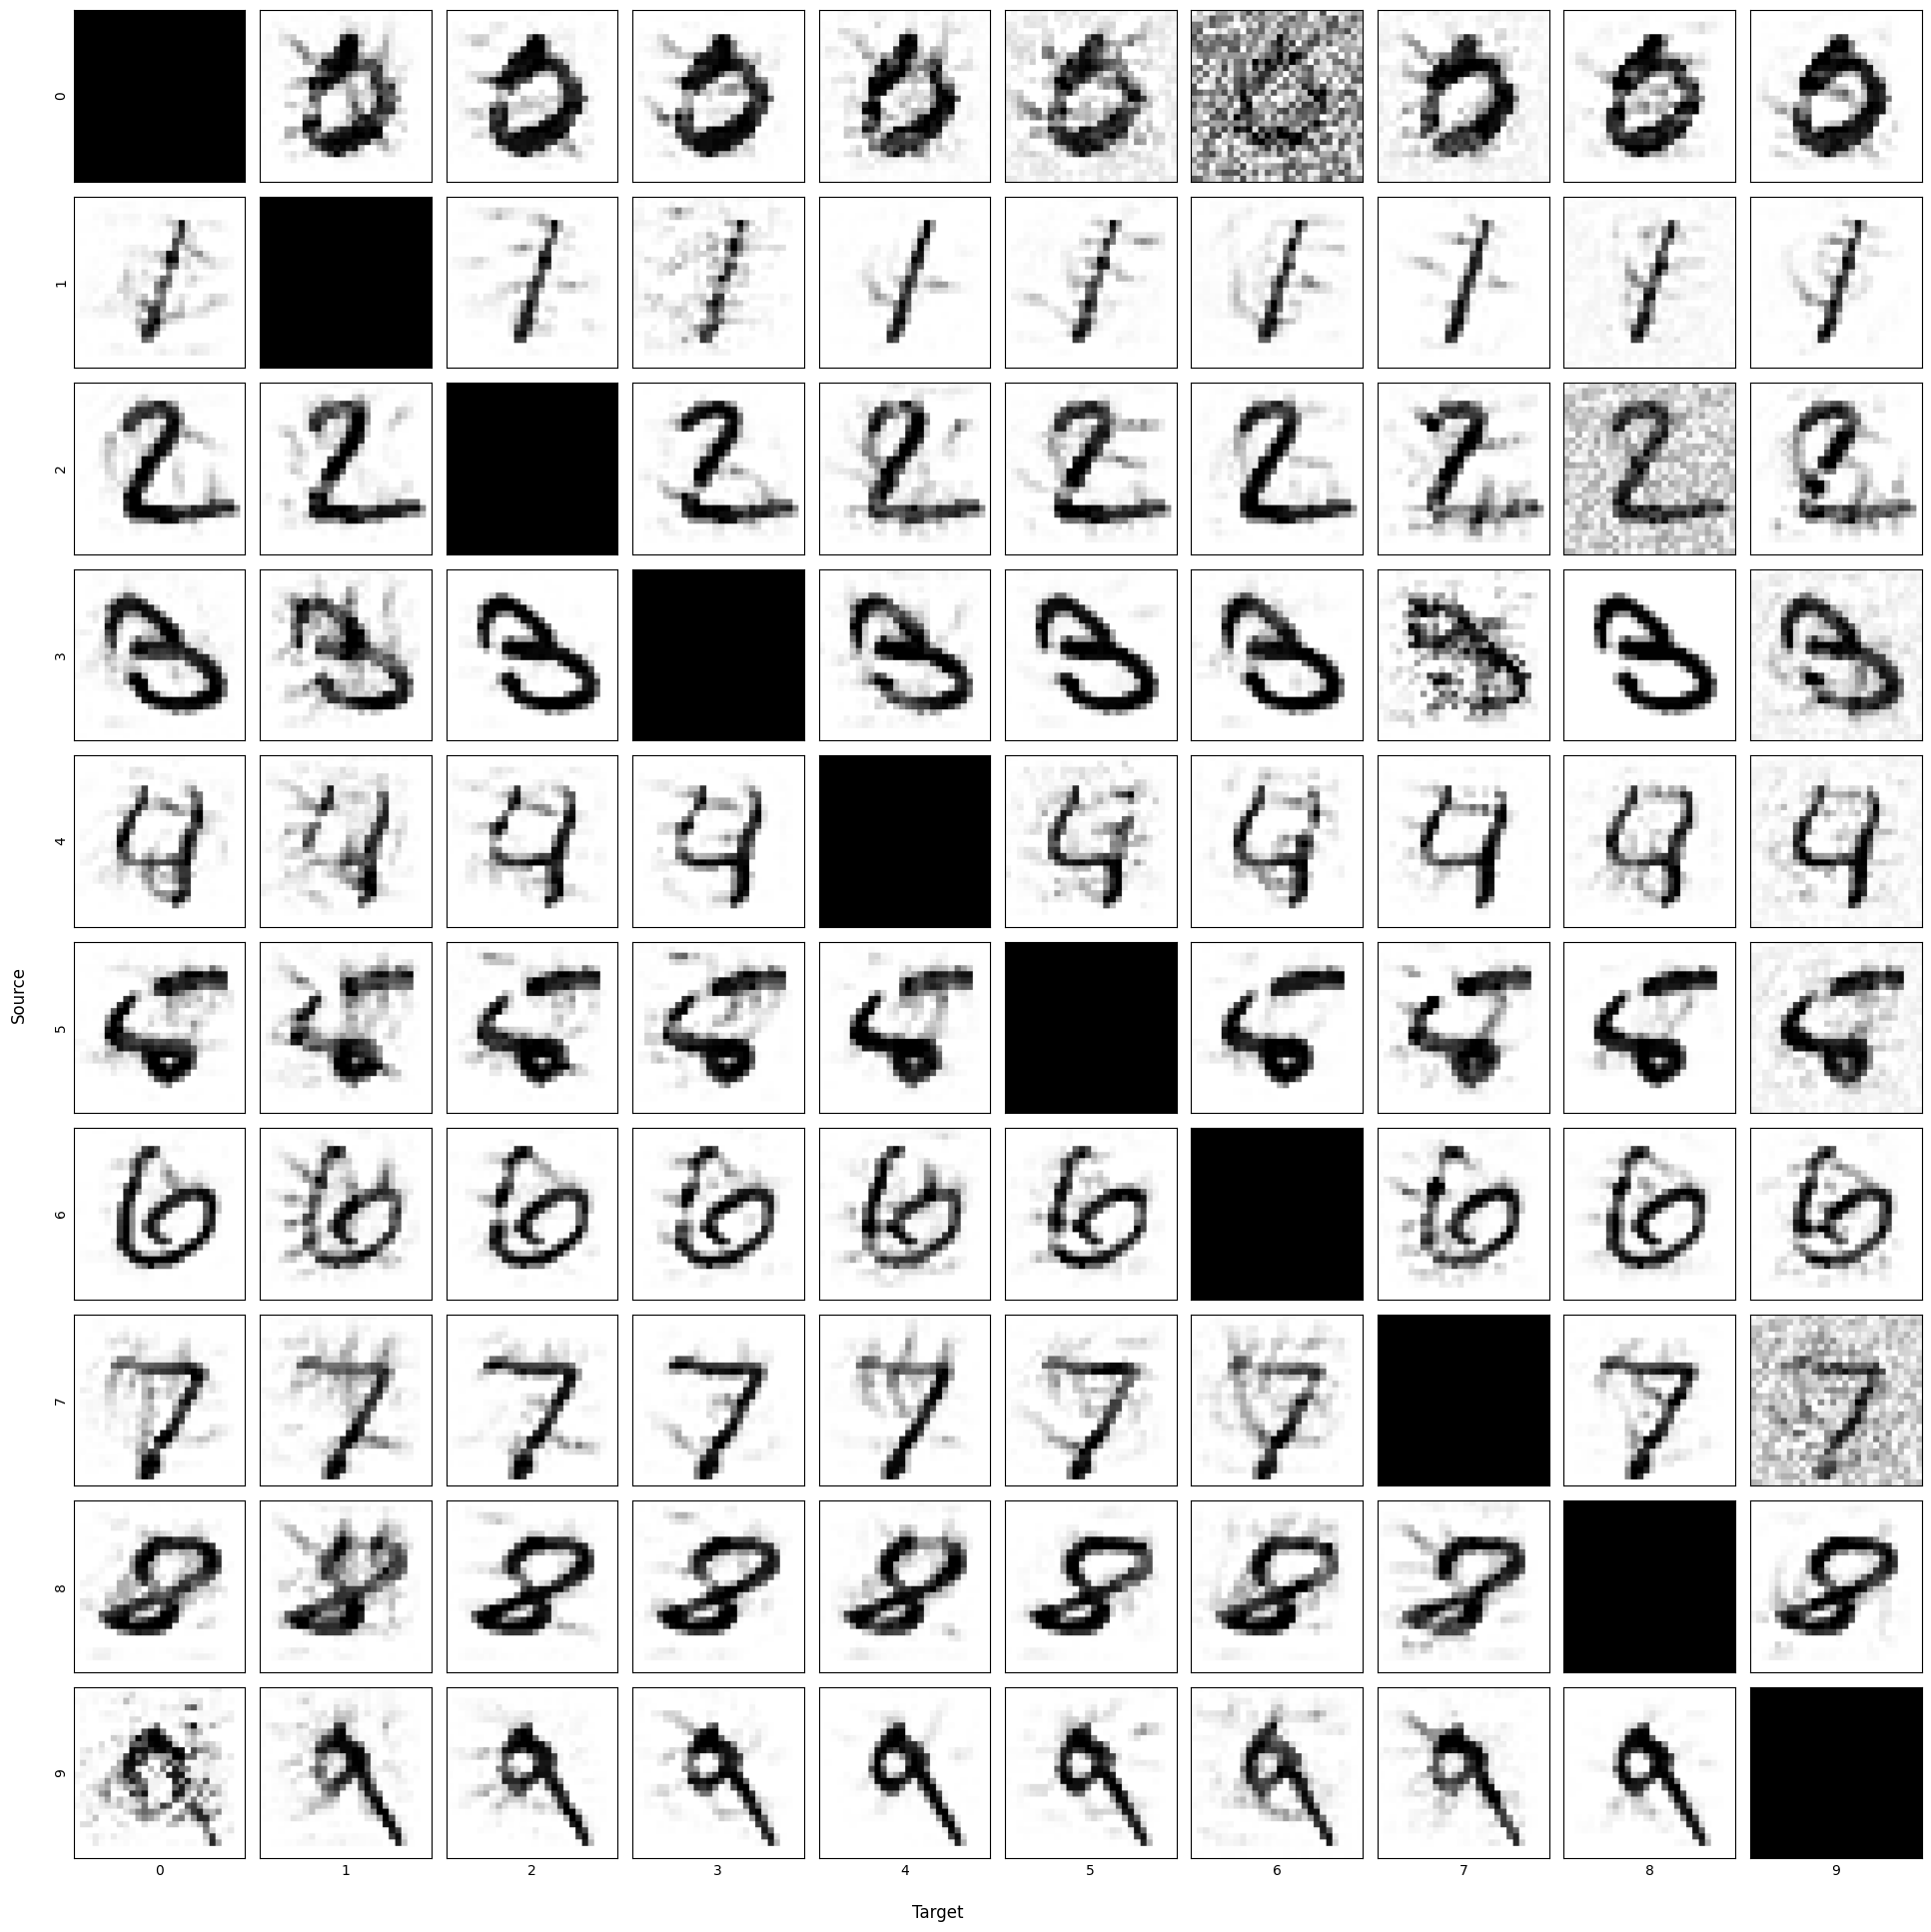

In [10]:
generate_image_all(ObjectFun.carlini.name, Dist.L2.name, 'SciPyAttack')

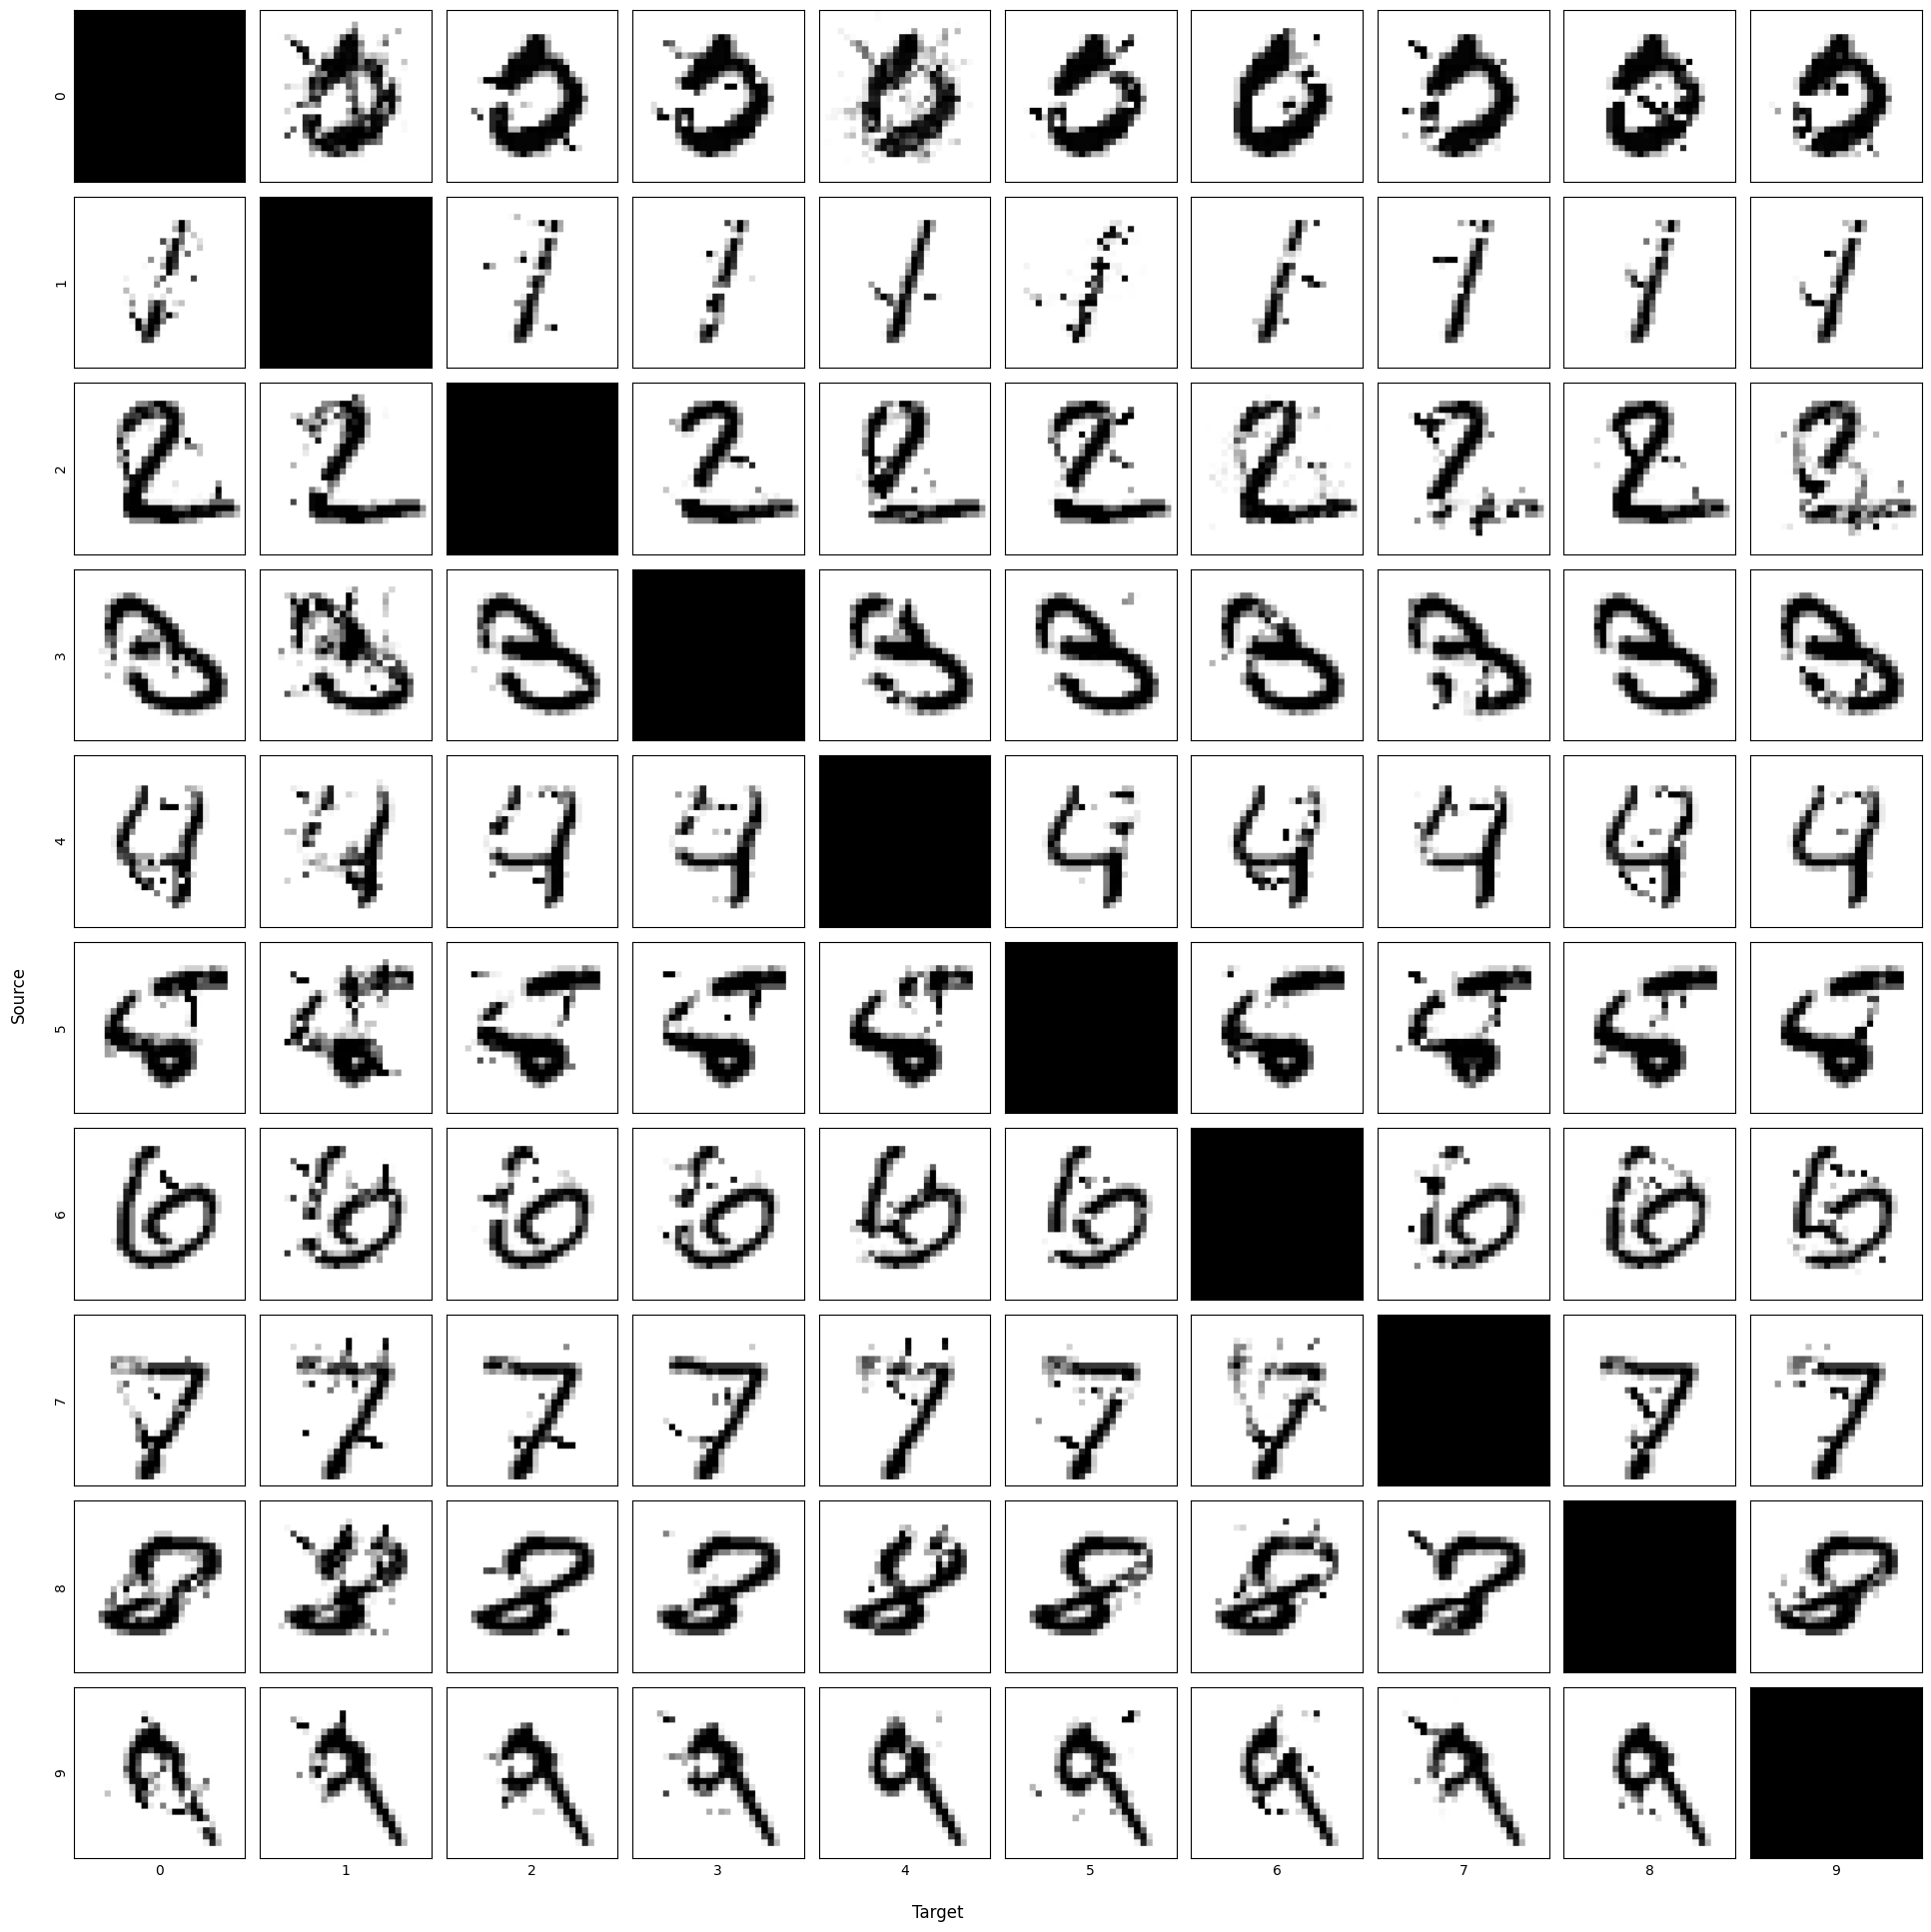

In [11]:
generate_image_all(ObjectFun.carlini.name, Dist.L1.name, 'SciPyAttack')

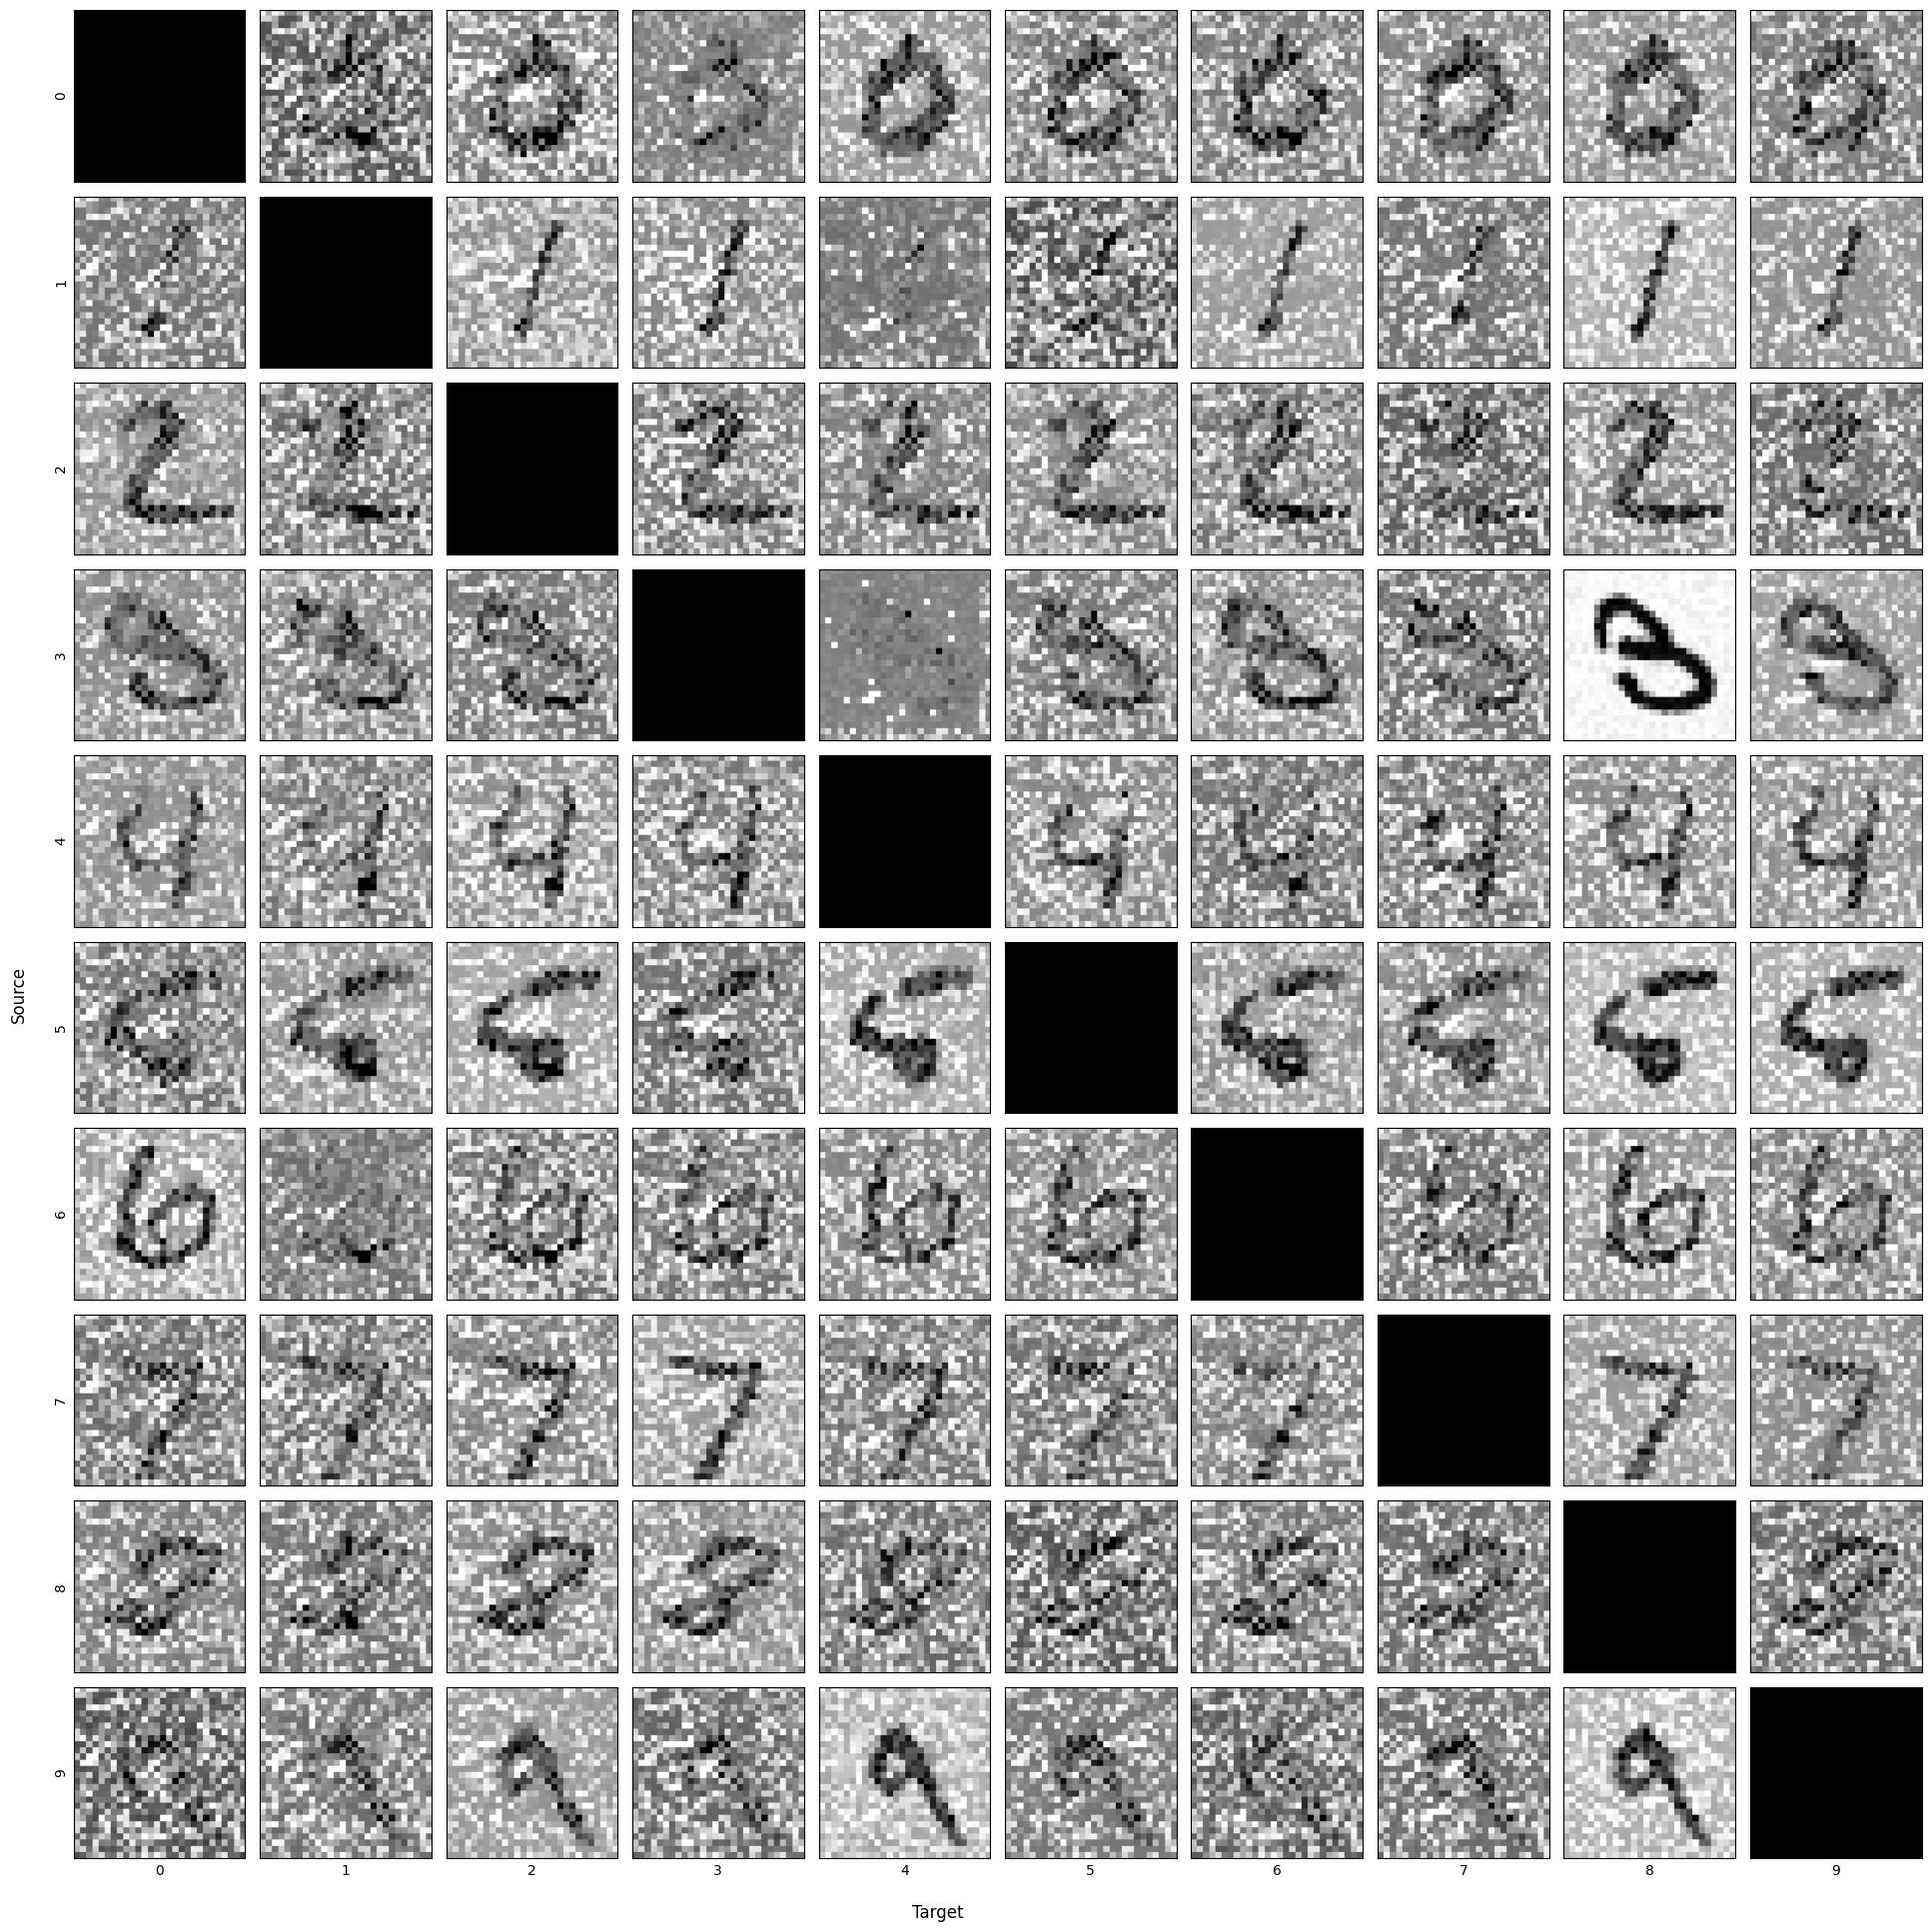

In [12]:
generate_image_all(ObjectFun.carlini.name, Dist.LINF.name, 'SciPyAttack')